In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mpl_toolkits import mplot3d
from numpy import set_printoptions
from numpy import absolute
from numpy import mean
from numpy import std



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.models import model_from_json

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from matplotlib import pyplot

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
    
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
import seaborn as sns
%matplotlib inline

In [2]:
prosody_data = pd.read_csv('Prosodic_Features_MRH.csv ')

In [3]:
prosody_data.head()

,participant&question,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,iInterval,MaxRising:3,MaxFalling:3,AvgTotRis:3,AvgTotFall:3,numRising,numFall,RecommendHiring,Hired,Hired3C
0,P1Q1,51.952125,0.015331,0.000295,75.232657,396.635613,127.989222,27.821528,217.628692,119.690367,...,138,274.562,257.247,25.872,20.106,91,4722.964842,5.106224,0,1
1,P1Q2,38.677312,0.015185,0.000393,75.165527,397.613041,131.067490,26.452853,195.852246,124.820583,...,100,268.613,270.193,24.647,15.886,71,2928.482587,5.106224,0,1
2,P1Q3,43.593896,0.014680,0.000337,71.034761,395.930688,127.739086,26.006330,189.441736,120.457847,...,114,283.912,203.506,23.720,16.951,79,3528.448990,5.106224,0,1
3,P1Q4,23.435813,0.008920,0.000381,74.938673,248.733738,129.563914,19.334327,103.024640,124.473851,...,55,100.655,83.172,13.148,5.044,36,1924.546685,5.106224,0,1
4,P1Q5,13.274833,0.003432,0.000259,93.949854,263.669188,130.178482,26.595483,174.934601,120.272480,...,32,129.591,117.119,14.706,11.073,19,1322.366516,5.106224,0,1


In [4]:
prosody_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   participant&question  680 non-null    object 
 1   duration              680 non-null    float64
 2   energy                680 non-null    float64
 3   power                 680 non-null    float64
 4   min_pitch             680 non-null    float64
 5   max_pitch             680 non-null    float64
 6   mean_pitch            680 non-null    float64
 7   pitch_sd              680 non-null    float64
 8   pitch_abs             680 non-null    float64
 9   pitch_quant           680 non-null    float64
 10  pitchUvsVRatio        680 non-null    float64
 11  Time:8                680 non-null    float64
 12  iDifference           680 non-null    float64
 13  diffPitchMaxMin       680 non-null    float64
 14  diffPitchMaxMean      680 non-null    float64
 15  diffPitchMaxMode      6

In [5]:
prosody_data.describe()

,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,iInterval,MaxRising:3,MaxFalling:3,AvgTotRis:3,AvgTotFall:3,numRising,numFall,RecommendHiring,Hired,Hired3C
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,...,680.000000,680.00000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,57.201539,0.010119,0.000159,74.356906,365.209221,169.242881,42.009550,246.886862,163.655634,1.193068,...,146.933824,213.12020,211.117346,27.542576,21.547319,88.869118,5564.506801,4.950746,0.088235,0.992647
std,36.117420,0.012226,0.000130,8.332808,41.614286,41.921335,13.154095,76.500370,46.615600,0.795525,...,99.187955,52.57662,53.494882,7.688180,8.454734,59.178885,4357.018782,0.721579,0.283846,0.818565
min,10.341458,0.000176,0.000013,56.049663,222.555742,92.979514,12.053274,76.004974,82.801688,0.301339,...,17.000000,90.97700,74.731000,9.800000,5.044000,11.000000,79.872717,3.189661,0.000000,0.000000
25%,32.839339,0.002527,0.000065,71.320330,339.477409,124.543847,33.160269,196.724385,113.288462,0.736553,...,80.000000,172.86125,173.455250,22.295500,15.521250,47.750000,2712.929560,4.529477,0.000000,0.000000
50%,49.762437,0.005648,0.000119,73.929065,376.743832,180.010964,40.569432,247.524278,178.438806,1.035074,...,123.000000,206.67350,209.036500,27.070500,20.215500,76.000000,4520.700221,4.967754,0.000000,1.000000
75%,71.724484,0.013414,0.000221,75.644207,397.296921,203.342602,48.220307,293.743385,203.973193,1.350608,...,184.500000,256.15325,253.252250,32.177250,26.054000,112.250000,7249.827921,5.448852,0.000000,2.000000
max,376.992000,0.134692,0.000873,198.840510,424.360354,254.871233,97.363392,524.459680,247.959843,7.681538,...,995.000000,324.85300,323.517000,54.361000,53.887000,590.000000,40513.328260,6.647218,1.000000,2.000000


Text(0.5, 0, 'Recommend Hiring')

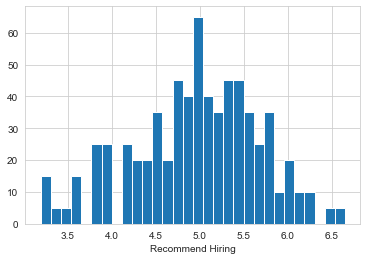

In [6]:
sns.set_style('whitegrid')
prosody_data['RecommendHiring'].hist(bins=30)
plt.xlabel('Recommend Hiring')

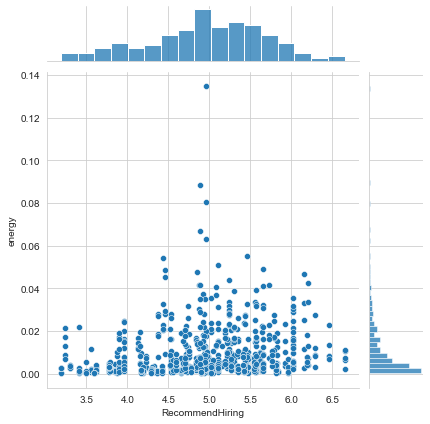

In [7]:
sns.jointplot(y='energy', x='RecommendHiring', data=prosody_data)

Text(0.5, 0, 'Recommend Hiring')

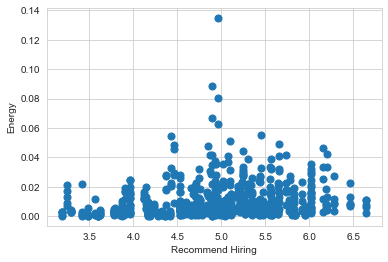

In [8]:

yRH = prosody_data['RecommendHiring']

cRH = prosody_data['Hired']


x1 = prosody_data['energy']
x2 = prosody_data['speakRate']
x3 = prosody_data['avgBand1']

plt.scatter(yRH,x1,s=50)
plt.ylabel('Energy')
plt.xlabel('Recommend Hiring')


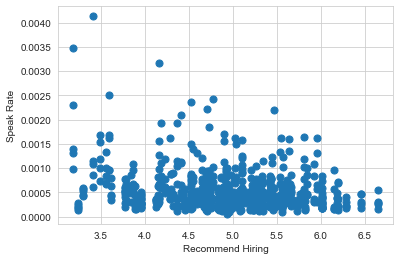

In [9]:
plt.scatter(yRH,x2,s=50)
plt.ylabel('Speak Rate')
plt.xlabel('Recommend Hiring')
plt.show()

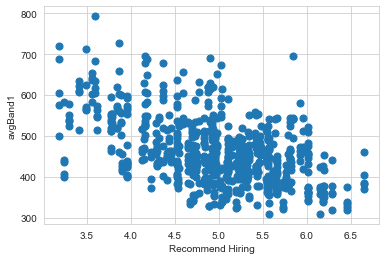

In [10]:
plt.scatter(yRH,x3,s=50)
plt.ylabel('avgBand1')
plt.xlabel('Recommend Hiring')
plt.show()

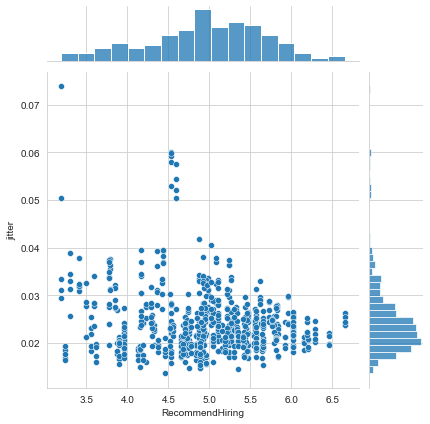

In [11]:
sns.jointplot(y='jitter', x='RecommendHiring', data=prosody_data)

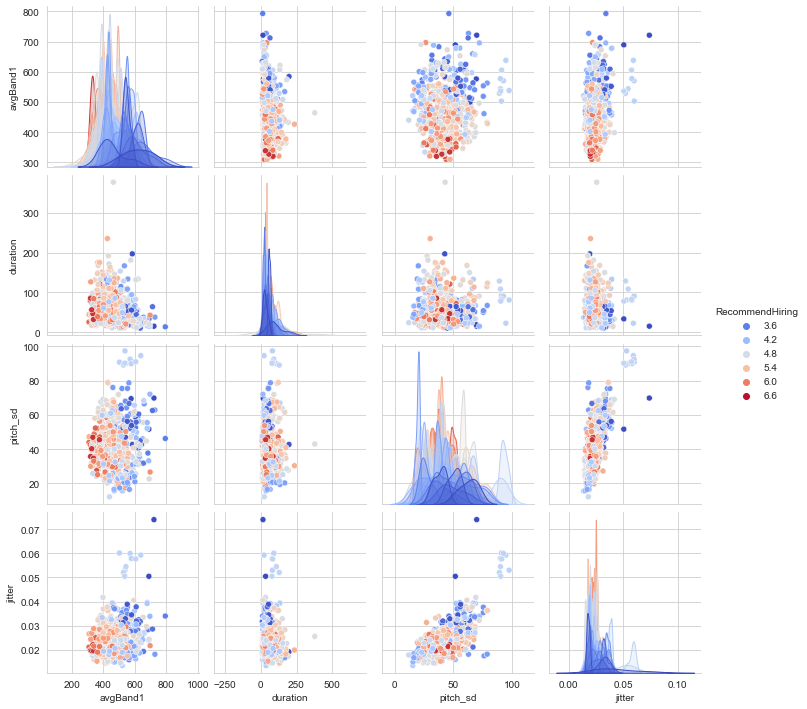

In [12]:
df1=prosody_data[['avgBand1', 'duration', 'pitch_sd', 'jitter','RecommendHiring']]
sns.pairplot(df1,hue='RecommendHiring',palette='coolwarm')

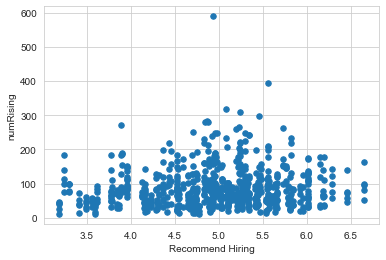

In [13]:
x4 =prosody_data['numRising']
    
plt.scatter(yRH,x4,s=30)
plt.ylabel('numRising')
plt.xlabel('Recommend Hiring')
plt.show()

<AxesSubplot:xlabel='avgBand1', ylabel='RecommendHiring'>

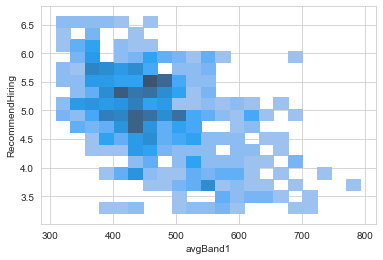

In [14]:
sns.histplot(x='avgBand1',y='RecommendHiring', data= prosody_data)

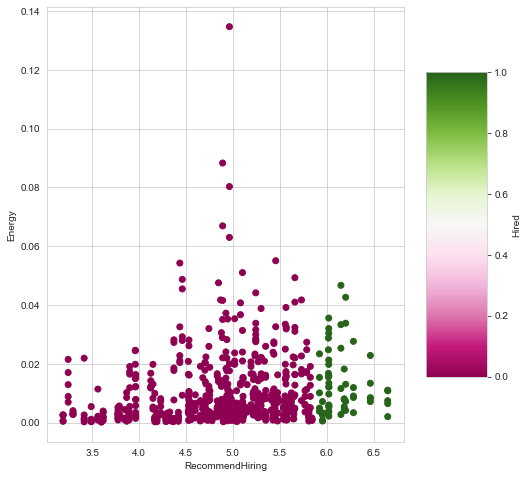

In [15]:
x1 = prosody_data['energy']
x2 = prosody_data['speakRate']
x3 = prosody_data['avgBand1']

# Creating plot
fig = plt.figure(figsize=(8,8))


ax = plt.axes()

#Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis mako_r
sctt = plt.scatter(yRH,x1, c=cRH, cmap= 'PiYG')
plt.ylabel('Energy')
plt.xlabel('RecommendHiring')
fig.colorbar(sctt, shrink = 0.7,label = 'Hired', aspect = 5)

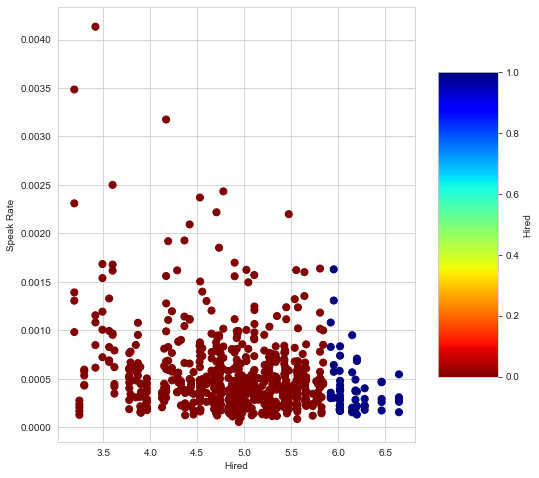

In [16]:
fig = plt.figure(figsize=(8,8))
sctt = plt.scatter(yRH,x2,c=cRH, cmap= 'jet_r',s=50)
plt.ylabel('Speak Rate')
plt.xlabel('Hired')
fig.colorbar(sctt, shrink = 0.7,label = 'Hired', aspect = 5)

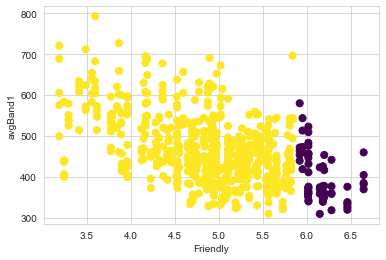

In [17]:
plt.scatter(yRH,x3,c=cRH, cmap= 'viridis_r',s=50)
plt.ylabel('avgBand1')
plt.xlabel('Friendly')
plt.show()

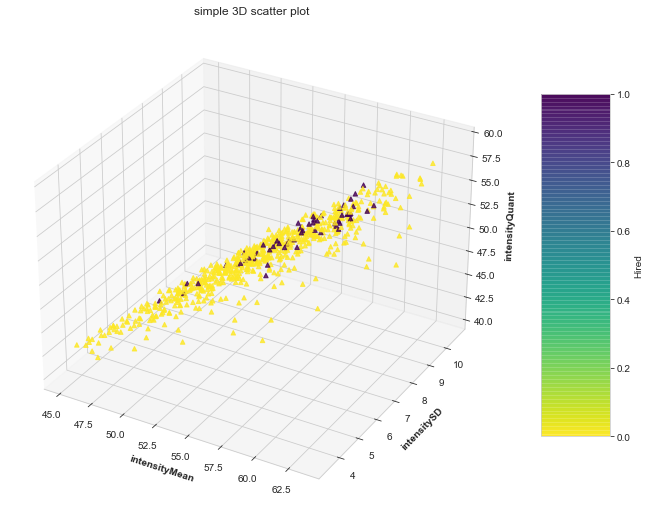

In [18]:
# Creating dataset
z = prosody_data['intensityQuant']
x = prosody_data['intensityMean']
y = prosody_data['intensitySD']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('viridis_r')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = cRH,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('intensityMean', fontweight ='bold')
ax.set_ylabel('intensitySD', fontweight ='bold')
ax.set_zlabel('intensityQuant', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7,label = 'Hired', aspect = 5)

# show plot


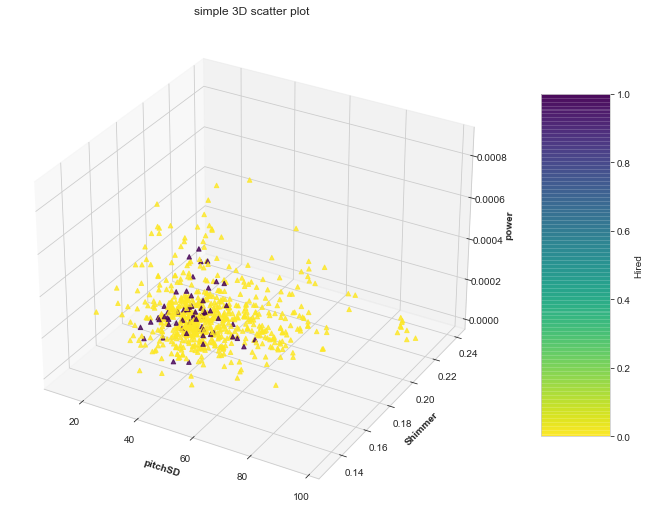

In [19]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset

x = prosody_data['pitch_sd']
y = prosody_data['shimmer']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))

ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('viridis_r')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = cRH,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('pitchSD', fontweight ='bold')
ax.set_ylabel('Shimmer', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7, label = 'Hired',aspect = 5)

# show plot


plt.show()

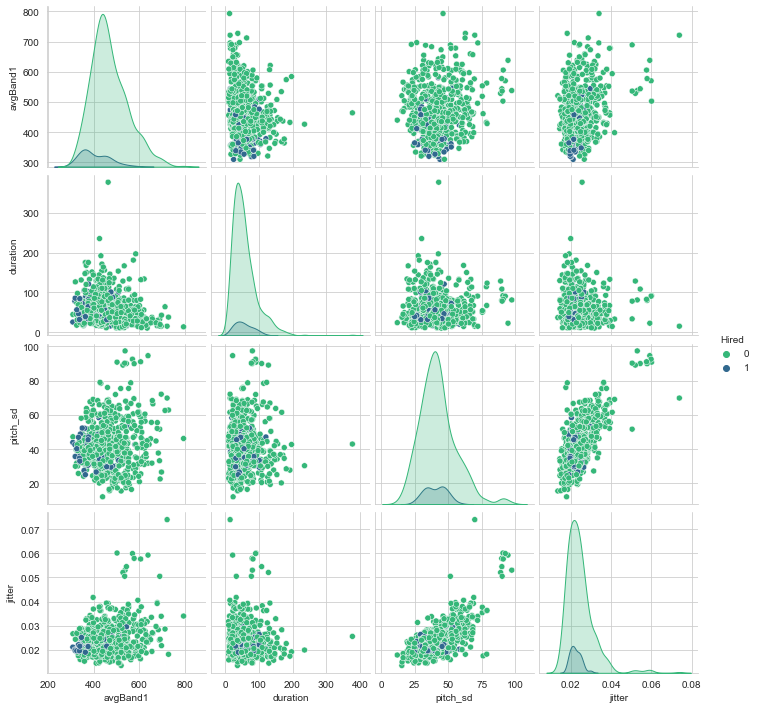

In [20]:
df1=prosody_data[['avgBand1', 'duration', 'pitch_sd', 'jitter','Hired']]
sns.pairplot(df1,hue='Hired',palette='viridis_r')

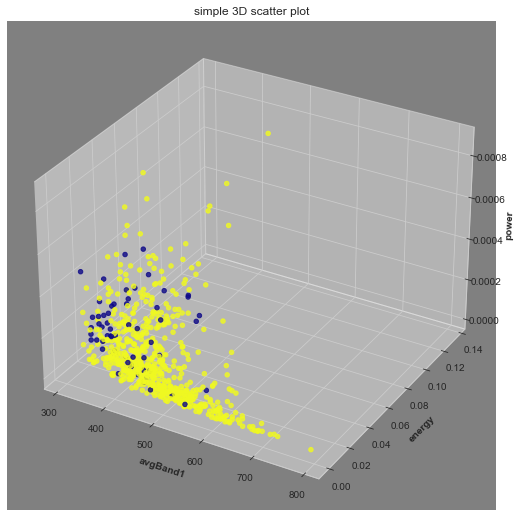

Text(0.5, 0, 'Energy')

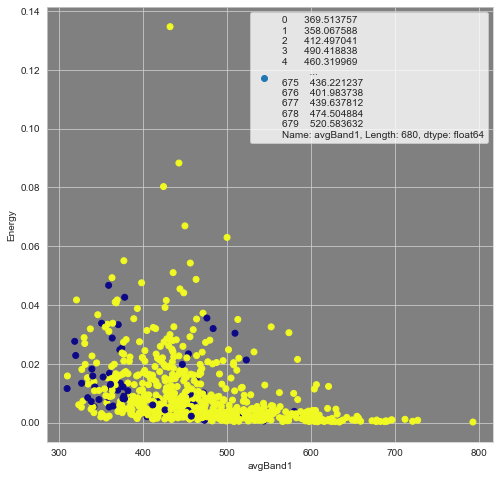

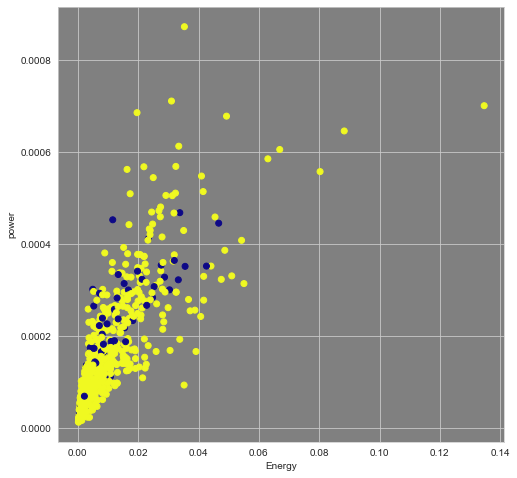

In [21]:
x = prosody_data['avgBand1']
y = prosody_data['energy']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.set_facecolor("gray")  
# Add x, y gridlines
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis
my_cmap = plt.get_cmap('plasma_r') 
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = cRH,
                    cmap = my_cmap,
                    marker ='o')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('avgBand1', fontweight ='bold')
ax.set_ylabel('energy', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
#fig.colorbar(sctt, shrink = 0.7, aspect = 5)

plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray") 
plt.scatter(x, y, c=cRH, cmap= 'plasma_r',label=x)
plt.ylabel('Energy')
plt.xlabel('avgBand1')
plt.legend()


fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray")  
plt.scatter(y, z, c=cRH, cmap= 'plasma_r')
plt.ylabel('power')
plt.xlabel('Energy')

In [22]:
cor = prosody_data.corr()
cor.style.background_gradient(cmap="coolwarm").set_precision(2)

,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,Time:8,iDifference,diffPitchMaxMin,diffPitchMaxMean,diffPitchMaxMode,intensityMin,intensityMax,intensityMean,intensitySD,intensityQuant,diffIntMaxMin,diffIntMaxMean,diffIntMaxMode,avgVal1,avgVal2,avgVal3,avgBand1,avgBand2,avgBand3,fmean1,fmean2,fmean3,f2meanf1,f3meanf1,f1STD,f2STD,f3STD,f2STDf1,f2STDf2,jitter,shimmer,jitterRap,meanPeriod,percentUnvoiced,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,AvgTotRis:3,AvgTotFall:3,numRising,numFall,RecommendHiring,Hired,Hired3C
duration,1.00,0.64,0.22,-0.22,0.34,-0.15,-0.01,-0.11,-0.16,0.03,1.00,-0.06,0.37,0.40,0.39,-0.14,0.40,0.26,0.25,0.22,0.42,0.38,0.33,-0.16,-0.20,-0.07,-0.17,-0.14,-0.13,-0.16,-0.20,-0.07,0.06,0.15,0.01,0.21,0.07,0.13,0.07,-0.03,0.01,-0.05,0.15,0.04,0.95,0.23,-0.59,0.96,0.34,0.08,0.98,0.95,0.43,0.41,0.00,-0.00,0.96,0.88,0.02,-0.02,0.01
energy,0.64,1.00,0.78,-0.05,0.29,-0.11,-0.07,-0.06,-0.14,-0.12,0.64,-0.03,0.29,0.33,0.33,0.00,0.67,0.69,0.63,0.59,0.66,0.32,0.36,-0.25,-0.24,-0.09,-0.34,-0.31,-0.19,-0.25,-0.24,-0.17,0.16,0.21,-0.07,0.19,0.01,0.21,0.11,-0.14,-0.18,-0.17,0.12,-0.12,0.57,-0.02,-0.42,0.59,0.27,0.15,0.65,0.57,0.35,0.31,0.00,-0.04,0.59,0.53,0.17,0.09,0.13
power,0.22,0.78,1.00,0.07,0.25,-0.03,-0.07,0.01,-0.07,-0.20,0.22,-0.01,0.23,0.23,0.25,0.14,0.77,0.89,0.77,0.77,0.72,0.22,0.33,-0.32,-0.26,-0.04,-0.47,-0.45,-0.19,-0.32,-0.26,-0.26,0.23,0.24,-0.16,0.14,-0.06,0.27,0.16,-0.18,-0.30,-0.21,0.06,-0.24,0.18,-0.20,-0.31,0.18,0.18,0.19,0.25,0.18,0.25,0.18,0.03,-0.04,0.19,0.20,0.28,0.15,0.23
min_pitch,-0.22,-0.05,0.07,1.00,-0.09,0.17,-0.17,-0.14,0.16,-0.02,-0.22,-0.02,-0.28,-0.21,-0.20,-0.02,0.03,0.06,0.10,0.01,0.03,-0.02,0.03,0.09,0.09,0.03,0.05,0.02,0.04,0.09,0.09,0.08,-0.05,-0.07,0.00,-0.06,-0.08,-0.04,-0.09,-0.15,-0.22,-0.14,-0.13,-0.01,-0.26,-0.18,0.22,-0.24,-0.04,0.05,-0.20,-0.26,-0.22,-0.24,-0.15,-0.19,-0.24,-0.27,-0.02,0.01,-0.04
max_pitch,0.34,0.29,0.25,-0.09,1.00,0.24,0.31,0.28,0.20,-0.05,0.34,0.09,0.98,0.61,0.58,0.02,0.35,0.33,0.24,0.32,0.34,0.20,0.18,-0.16,-0.07,-0.02,-0.25,-0.23,-0.10,-0.16,-0.07,-0.04,0.15,0.16,-0.17,-0.04,-0.16,0.16,0.06,0.07,-0.14,0.05,-0.22,-0.13,0.33,0.02,-0.38,0.33,0.17,0.08,0.34,0.33,0.51,0.50,0.29,0.23,0.32,0.35,0.15,0.12,0.16
mean_pitch,-0.15,-0.11,-0.03,0.17,0.24,1.00,0.26,0.43,0.98,-0.19,-0.15,0.08,0.20,-0.62,-0.64,-0.17,0.04,0.03,0.01,0.03,0.08,0.03,0.03,0.02,0.35,0.06,-0.17,-0.02,0.03,0.02,0.35,0.23,0.18,0.08,-0.39,-0.53,-0.59,0.04,-0.16,-0.09,-0.53,-0.08,-0.98,-0.31,-0.22,-0.40,0.01,-0.17,0.03,0.09,-0.13,-0.20,-0.33,-0.31,0.26,-0.01,-0.18,-0.21,0.15,0.21,0.09
pitch_sd,-0.01,-0.07,-0.07,-0.17,0.31,0.26,1.00,0.62,0.22,0.47,-0.01,0.14,0.33,0.04,0.05,0.01,0.01,-0.09,-0.12,-0.15,0.01,0.14,0.14,0.11,0.20,0.10,0.15,0.10,0.15,0.11,0.20,0.23,-0.01,-0.01,0.12,-0.14,-0.02,-0.21,-0.20,0.69,0.29,0.67,-0.28,0.34,0.04,0.40,0.17,-0.05,0.17,0.19,0.03,0.06,0.25,0.25,0.74,0.81,-0.04,0.15,-0.14,-0.04,-0.13
pitch_abs,-0.11,-0.06,0.01,-0.14,0.28,0.43,0.62,1.00,0.42,-0.19,-0.11,0.19,0.30,-0.12,-0.14,0.10,-0.04,0.08,-0.07,0.22,-0.06,-0.17,-0.24,-0.24,-0.02,-0.01,-0.28,-0.16,-0.07,-0.24,-0.02,0.01,0.29,0.29,-0.30,-0.34,-0.34,0.07,0.02,0.47,0.04,0.45,-0.44,-0.31,0.01,-0.19,-0.04,-0.06,-0.17,-0.20,-0.14,0.04,0.13,0.15,0.77,0.66,-0.02,0.10,0.15,0.12,0.09
pitch_quant,-0.16,-0.14,-0.07,0.16,0.20,0.98,0.22,0.42,1.00,-0.21,-0.16,0.09,0.17,-0.64,-0.68,-0.16,-0.01,-0.02,-0.04,-0.01,0.02,0.01,-0.00,0.02,0.34,0.06,-0.14,-0.00,0.04,0.02,0.34,0.23,0.18,0.08,-0.37,-0.54,-0.58,0.01,-0.17,-0.12,-0.54,-0.10,-0.97,-0.31,-0.23,-0.41,0.01,-0.18,0.01,0.06,-0.15,-0.21,-0.35,-0.33,0.23,-0.04,-0.19,-0.24,0.12,0.18,0.07
pitchUvsVRatio,0.03,-0.12,-0.20,-0.02,-0.05,-0.19,0.47,-0.19,-0.21,1.00,0.03,-0.02,-0.05,0.11,0.14,-0.03,-0.03,-0.31,-0.23,-0.50,-0.02,0.36,0.39,0.40,0.27,0.08,0.53,0.30,0.23,0.40,0.27,0.27,-0.32,-0.33,0.46,0.10,0.33,-0.39,-0.26,0.49,0.48,0.48,0.17,0.87,-0.01,0.78,0.44,-0.05,0.28,0

<AxesSubplot:xlabel='Hired', ylabel='meanPeriod'>

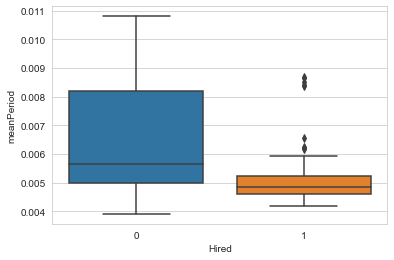

In [23]:
sns.boxplot(x=cRH, y='meanPeriod',data= prosody_data)

<AxesSubplot:xlabel='Hired', ylabel='f2STDf1'>

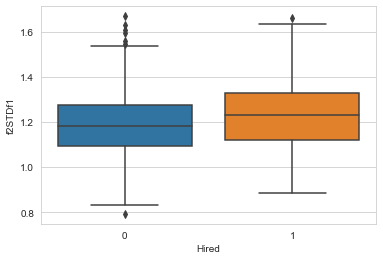

In [24]:
sns.boxplot(x=cRH, y='f2STDf1',data= prosody_data)

<AxesSubplot:xlabel='Hired', ylabel='power'>

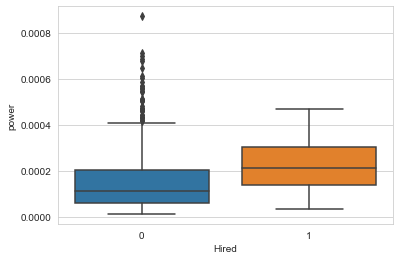

In [25]:
sns.boxplot(x=cRH, y='power',data= prosody_data)

<AxesSubplot:xlabel='Hired', ylabel='avgBand1'>

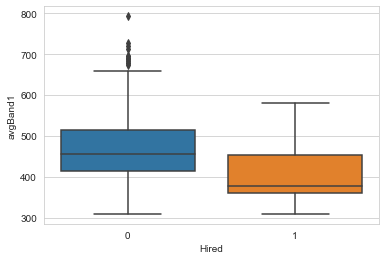

In [26]:
sns.boxplot(x=cRH, y='avgBand1',data= prosody_data)

Text(0.5, 1.0, 'Percentage %')

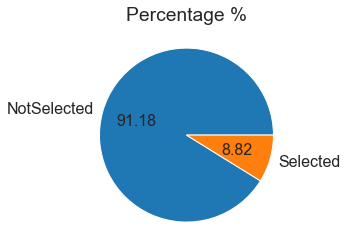

In [27]:
Hr = np.array(prosody_data['Hired'].value_counts())
arr = prosody_data['Hired']
arrLB = []
for i in arr:
    if(i==1):
        arrLB.append('Selected')
    else:
        arrLB.append('NotSelected')
x=np.array(arrLB)
lb = (np.unique(x))
plt.rcParams.update({'font.size':16})#figure.figsize':[10,10],
plt.pie(Hr,labels = lb, autopct = '%0.2f')
plt.title("Percentage %")

In [28]:
ranks = {}
from sklearn.preprocessing import MinMaxScaler
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    #ranks = map(lambda x: round(x, 5), ranks)
    return dict(zip(names, ranks ))

# Feature Selection Using Kbest

In [29]:
def select_feature_kbest(prosody_data_y):
    array =  prosody_data.values

    X = prosody_data_X
    Y = prosody_data_y
    # feature extraction
    kbest_test = SelectKBest(score_func=f_classif, k=4)
    fit = kbest_test.fit(X, Y)
    # summarize scores
    set_printoptions(precision=3)
    #print(fit.scores_)
    features = fit.transform(X)
    # summarize selected features
    #print(features[0:5,:])

    ranks["kbest"] = rank_to_dict(np.abs(fit.scores_), prosody_data_X)
    rankDict = {}
    rankDict = ranks["kbest"]
    return rankDict

# Feature Selection Using Ridge Regression

In [30]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
def select_feature_ridge(prosody_data_y):
    array = prosody_data.values
    X=prosody_data_X
    y=prosody_data_y
    # define model
    ridge_model = Ridge(alpha=1.0)
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(ridge_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    #print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    #print(scores)
    
    ranks["ridge"] = rank_to_dict(np.abs(scores), prosody_data_X)
    rankDict = {}
    rankDict = ranks["ridge"]
    return rankDict

# Feature Selection Using Lasso

In [31]:
from sklearn.linear_model import Lasso 

def select_feature_lasso(prosody_data_y):
    array =  prosody_data.values

    X = prosody_data_X
    y = prosody_data_y
    
    lasso = Lasso(alpha=.5)
    lasso.fit(X, y)

    cross_val_score(lasso, prosody_data_X , prosody_data_y,cv=3)

    ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), prosody_data_X)
    rankDict = {}
    rankDict = ranks['Lasso']
    return rankDict

# Making arrays of Top 10 20 30 Features

In [32]:
def select_features(rankDict):
    selectedFeatures = []

    selectedFeatures = dict(sorted(rankDict.items(), key=lambda item: item[1],reverse=True))


    selectedFeatures_10 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<10):
            selectedFeatures_10.append(key)
            i+=1

    selectedFeatures_20 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<20):
            selectedFeatures_20.append(key)
            i+=1

    selectedFeatures_30 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<30):
            selectedFeatures_30.append(key)
            i+=1
    return selectedFeatures_10,selectedFeatures_20,selectedFeatures_30


In [33]:
prosody_data_X = prosody_data.drop(['participant&question','RecommendHiring','Hired','Hired3C'],axis=1)

# Feature selection for RecommendHiring

In [1]:
prosody_data_y = yRH
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)

#using Kbest
selectedFeatures_RecommendHiring_Kbest=select_feature_kbest( prosody_data_y)
print("\nScores of Features for RecommendHiring Using Kbest")
print(selectedFeatures_RecommendHiring_Kbest)

#Using Lasso
selectedFeatures_RecommendHiring_Lasso=select_feature_lasso( prosody_data_y)
print("\nScores of Features for RecommendHiring using Lasso")
print(selectedFeatures_RecommendHiring_Lasso)

#Using Ridge
selectedFeatures_RecommendHiring_Ridge=select_feature_ridge( prosody_data_y)
print("\nScores of Features for RecommendHiring using Ridge")
print(selectedFeatures_RecommendHiring_Ridge)


NameError: name 'yRH' is not defined

In [35]:
selectedFeatures_kbest_10_RecommendHiring,selectedFeatures_kbest_20_RecommendHiring,selectedFeatures_kbest_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Kbest)
print("\n\n\nTop 10 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_10_RecommendHiring )
print("\nTop 20 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_20_RecommendHiring )
print("\nTop 30 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_30_RecommendHiring )


selectedFeatures_lasso_10_RecommendHiring,selectedFeatures_lasso_20_RecommendHiring,selectedFeatures_lasso_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Lasso)
print("\n\n\nTop 10 Selected Features for RecommendHiring Using Lasso:",selectedFeatures_lasso_10_RecommendHiring )
print("\nTop 20 Selected Features For RecommendHiring Using Lasso:",selectedFeatures_lasso_20_RecommendHiring)
print("\nTop 30 Selected Features Using For RecommendHiring Using Lasso:",selectedFeatures_lasso_30_RecommendHiring )

selectedFeatures_ridge_10_RecommendHiring,selectedFeatures_ridge_20_RecommendHiring,selectedFeatures_ridge_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Ridge)
print("\n\n\nTop 10 Selected Features For RecommendHiring Using ridge :",selectedFeatures_ridge_10_RecommendHiring )
print("\nTop 20 Selected For RecommendHiring Features Using ridge:",selectedFeatures_ridge_20_RecommendHiring )
print("\nTop 30 Selected For RecommendHiring Features Using ridge:",selectedFeatures_ridge_30_RecommendHiring )





Top 10 Selected Features Using kbest for RecommendHiring: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean']

Top 20 Selected Features Using kbest for RecommendHiring: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1']

Top 30 Selected Features Using kbest for RecommendHiring: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'avgBand1', 'percentUnvoiced', 'AvgTotRis:3', 'power', 'pitchUvsVRatio', 'f3meanf1', 'intensityMin', 'diffPitchMaxMode']



Top 10 Selected Features for RecommendHir

# Common Selected Features For Recommend Hiring

In [36]:
def IntersecOfSets(arr1, arr2, arr3):
    # Converting the arrays into sets
    s1 = np.intersect1d(arr1, arr2)
    print(s1)   #['avgVal2' 'f2STD' 'fmean2' 'fmean3' 'pitch_sd']
    result_set = np.intersect1d(s1, arr3)
    print(result_set)
      
    return result_set

In [37]:
Commonly_selected_Features_RH = []
Commonly_selected_Features_RH = IntersecOfSets(selectedFeatures_kbest_30_RecommendHiring,selectedFeatures_lasso_30_RecommendHiring,selectedFeatures_ridge_30_RecommendHiring)
print(Commonly_selected_Features_RH)

['avgBand1' 'avgVal2' 'diffPitchMaxMode' 'f2STD' 'fmean2' 'fmean3'
 'intensityMean' 'intensityMin' 'intensityQuant' 'intensitySD'
 'mean_pitch' 'pitchUvsVRatio' 'pitch_abs' 'pitch_quant' 'pitch_sd'
 'power']
['avgBand1' 'avgVal2' 'diffPitchMaxMode' 'intensityMean' 'intensityMin'
 'intensityQuant' 'intensitySD' 'mean_pitch' 'pitchUvsVRatio' 'pitch_abs'
 'pitch_quant' 'pitch_sd' 'power']
['avgBand1' 'avgVal2' 'diffPitchMaxMode' 'intensityMean' 'intensityMin'
 'intensityQuant' 'intensitySD' 'mean_pitch' 'pitchUvsVRatio' 'pitch_abs'
 'pitch_quant' 'pitch_sd' 'power']


# Applying Models

In [38]:
def apply_NN_Model(no_of_inNeurons,no_of_hiddenLayerNeurons,no_of_epochs,selectedFeatures_No,d_Var,T_Val):
    scaler = MinMaxScaler()
    X=prosody_data[selectedFeatures_No].values
    X =  scaler.fit_transform(X)
    Y=d_Var
    
    #encode class values as integers
    encoder = LabelEncoder()
    encoder.fit(Y)
    y = encoder.transform(Y)
    
    
    def baseline_model():
        # create model
        model = Sequential()
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(2, activation='sigmoid')) #'softmax'
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    build_model=baseline_model
    estimator = KerasClassifier(build_model, epochs=no_of_epochs, batch_size=5, verbose=0)
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(estimator, X, y, cv=kfold)
    print("Baseline: %.2f%% (%.2f%%)" % (cv_results.mean()*100, cv_results.std()*100))
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    #y_pred= cross_val_predict(estimator, X, y, cv=10)
        
    target_names = ['class 0', 'class 1']
        
    print(classification_report(y_test,y_pred,target_names=target_names, zero_division=0))
       
    
    print('MSE',metrics.mean_squared_error(y_test,y_pred))

    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True,fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    tnser_pred = estimator.predict(X_test)
    # generate a no skill prediction (majority class)
    ns_pred = [0 for _ in range(len(y_test))]
    # calculate accuracy scores
    ns_auc = roc_auc_score(y_test, ns_pred)
    tnser_auc = roc_auc_score(y_test, tnser_pred)
    # summarize scores
    # print('No Skill: ROC AUC=%.3f' % (ns_auc))
    # print('Logistic: ROC AUC=%.3f' % (tnser_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_pred)
    tnser_fpr, tnser_tpr, _ = roc_curve(y_test, tnser_pred)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill' )
    plt.plot(tnser_fpr, tnser_tpr,marker='o', label='NN ' )
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
  
           
    return (build_model, cv_results, tnser_fpr, tnser_tpr, tnser_auc)

# Applying Models For RecommendHiring

Baseline: 93.38% (3.03%)
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98       126
     class 1       1.00      0.50      0.67        10

    accuracy                           0.96       136
   macro avg       0.98      0.75      0.82       136
weighted avg       0.96      0.96      0.96       136

MSE 0.03676470588235294


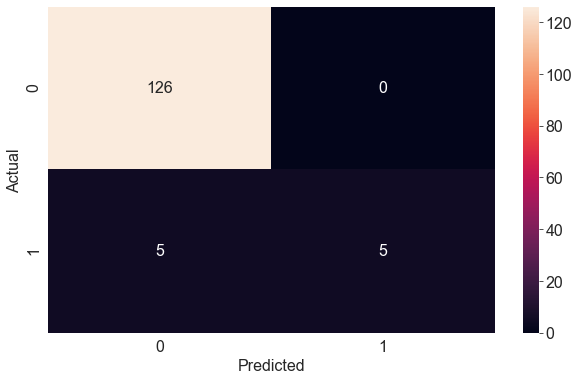

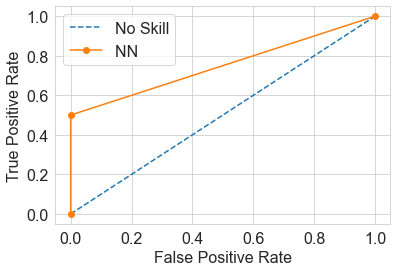

[0.912 0.882 0.956 0.971 0.912 0.971 0.912 0.971 0.941 0.912]


In [39]:
TRH = 5.9

cvscores_NN_Commonly_selected_Features_RH = []
(model_Commonly_selected_Features_RH,cvscores_Commonly_selected_Features_RH,FP_Rate_Commonly_selected_Features_RH,TP_Rate_Commonly_selected_Features_RH,auc_NN_Commonly_selected_Features_RH) = apply_NN_Model(13,23,300,Commonly_selected_Features_RH,cRH,TRH)
print(cvscores_Commonly_selected_Features_RH)

# Applying LSTM Model

 def baseline_LSTM_model():
        model = Sequential()
        model.add(LSTM(units=no_of_hiddenLayerNeurons, activation='relu', return_sequences=True, input_shape=(no_of_inNeurons, 1)))
        model.add(Dropout(0.2))
        model.add(LSTM(units=no_of_hiddenLayerNeurons, activation='relu', return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.summary()
        return model
    ###################################################
    def baseline_LSTM_model(input_length):
        print ('Creating model...')
        model = Sequential()
        model.add(Embedding(input_dim = no_of_inNeurons, output_dim = 50, input_length = input_length))
        model.add(LSTM(units=no_of_hiddenLayerNeurons, activation='relu', return_sequences=True, input_shape=(no_of_inNeurons, 1)))
        model.add(Dropout(0.5))
        model.add(LSTM(units=no_of_hiddenLayerNeurons, activation='relu', return_sequences=False))
        model.add(Dropout(0.5))
        model.add(Dense(1, activation='sigmoid'))

        print ('Compiling...')
        model.compile(loss='binary_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])
        return model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
    
    model = baseline_LSTM_model(len(X_train[0]))

    print ('Fitting model...')
    hist = model.fit(X_train, y_train, batch_size=64, validation_split = 0.1, verbose = 1)

    score, acc = model.evaluate(X_test, y_test, batch_size=1)
    ########################################################
    model.add(LSTM(leng, batch_input_shape=(None,13,leng),return_sequences=True,activation='sigmoid'))
    model.add(LSTM(leng, batch_input_shape=(None,13,leng),return_sequences=True,activation='sigmoid'))
    model.add(LSTM(leng, batch_input_shape=(None,13,leng),return_sequences=True,activation='sigmoid'))
    model.add(LSTM(leng, batch_input_shape=(None,13,leng),return_sequences=True,activation='sigmoid'))
    model.add(LSTM(leng, batch_input_shape=(None,13,leng),return_sequences=True,activation='sigmoid'))
    
    print ('Creating model...')
    # Build Model
    model = Sequential()  
    model.add(LSTM(leng, batch_input_shape=(2,13),return_sequences=False,activation='sigmoid'))
    
    model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
    #return model
    #estimator = KerasClassifier(build_model, epochs=no_of_epochs, batch_size=5, verbose=0)
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(hist, X, y, cv=kfold)
    print ('Fitting model...')
    model.fit(X_train, y_train, epochs=10000, batch_size=50,verbose=0,shuffle=False)
    predict = model.predict(data)
    

    

In [40]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Flatten,LSTM,Dropout
kfold=KFold(10,True,7)
cvscores = []

def apply_LSTM_Model(no_of_inNeurons,no_of_hiddenLayerNeurons,no_of_epochs,selectedFeatures_No,d_Var,T_Val):
    scaler = MinMaxScaler()
    X=prosody_data[selectedFeatures_No].values
    X =  scaler.fit_transform(X)
    Y=d_Var
    
    #encode class values as integers
    encoder = LabelEncoder()
    encoder.fit(Y)
    y = encoder.transform(Y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
    leng = 100
    data = X
    target = y
    X_train = np.reshape(X_train, (X_train.shape[0], 1, 13))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, 13))
    ###################################################
    
    output_size=1 
    neurons=100 
    activ_func="relu"
    dropout=0.25
    loss="mean_squared_error" 
    optimizer="sgd"
    print ('Creating model...')
    model = Sequential()
    model.add(LSTM(neurons,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(neurons,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(neurons,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(neurons,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(neurons,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(neurons,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(500))
    
 
    model.add(Dropout(dropout))
    
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer='adam',metrics =["accuracy"])
    print ('Fitting model...')
    model.fit(X_train, y_train, epochs=20, batch_size=100, verbose=0,shuffle=False)
    
    

   
    ########################################################
    
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    
   
    
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
    #model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #y_pred= cross_val_predict(estimator, X, y, cv=10)
    
    pred1=[]
    pred=model.predict(X_test)
    for element in pred:
        if element >= 6:
            pred1.append(1)
        else:
            pred1.append(0)
        
    target_names = ['class 0', 'class 1']
        
    print(classification_report(y_test,pred1,target_names=target_names, zero_division=0))
    
    matrix = classification_report(y_test,pred1,labels=[1,0])
    print('Classification report : \n',matrix) 
    
    print('MSE',metrics.mean_squared_error(y_test,pred1))

    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, pred1), annot = True,fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    tnser_pred =model.predict(X_test)
    # generate a no skill prediction (majority class)
    ns_pred = [0 for _ in range(len(y_test))]
    # calculate accuracy scores
    ns_auc = roc_auc_score(y_test, ns_pred)
    tnser_auc = roc_auc_score(y_test, tnser_pred)
    # summarize scores
    # print('No Skill: ROC AUC=%.3f' % (ns_auc))
    # print('Logistic: ROC AUC=%.3f' % (tnser_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_pred)
    tnser_fpr, tnser_tpr, _ = roc_curve(y_test, tnser_pred)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill' )
    plt.plot(tnser_fpr, tnser_tpr,marker='o', label='NN ' )
    # show the lengend
   # plt.lengend()
    # show the plot
    plt.show()
    
  
           
    return (model, cvscores, tnser_fpr, tnser_tpr, tnser_auc)

C:\Users\Anagha\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Creating model...
Fitting model...
accuracy: 92.65%
92.65% (+/- 0.00%)
              precision    recall  f1-score   support

     class 0       0.93      1.00      0.96       126
     class 1       0.00      0.00      0.00        10

    accuracy                           0.93       136
   macro avg       0.46      0.50      0.48       136
weighted avg       0.86      0.93      0.89       136

Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           0       0.93      1.00      0.96       126

    accuracy                           0.93       136
   macro avg       0.46      0.50      0.48       136
weighted avg       0.86      0.93      0.89       136

MSE 0.07352941176470588


C:\Users\Anagha\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anagha\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anagha\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


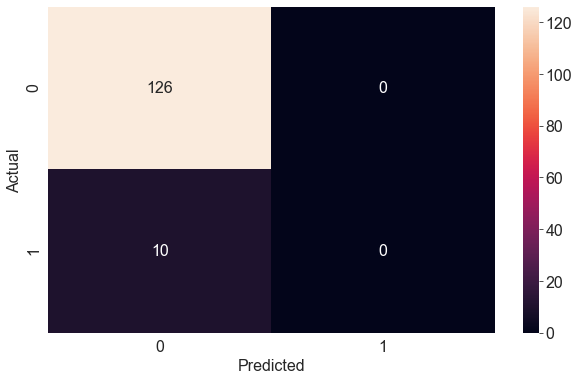

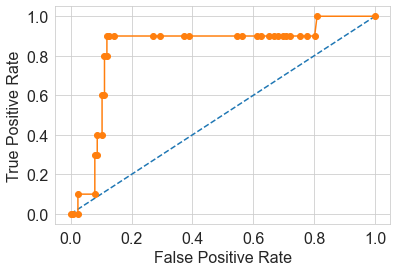

[92.64705777168274]


In [41]:
TRH = 5.9

cvscores_NN_Commonly_selected_Features_RH1 = []
(model_Commonly_selected_Features_RH1,cvscores_Commonly_selected_Features_RH1,FP_Rate_Commonly_selected_Features_RH1,TP_Rate_Commonly_selected_Features_RH1,auc_NN_Commonly_selected_Features_RH1) = apply_LSTM_Model(13,200,200,Commonly_selected_Features_RH,cRH,TRH)
print(cvscores_Commonly_selected_Features_RH1)

In [42]:
dfs = prosody_data[['avgBand1','avgVal2','diffPitchMaxMode','intensityMean','intensityMin'
,'intensityQuant','intensitySD','mean_pitch','pitchUvsVRatio','pitch_abs'
,'pitch_quant','pitch_sd','power','Hired']]
cor = dfs.corr()
cor.style.background_gradient(cmap="coolwarm").set_precision(2)

,avgBand1,avgVal2,diffPitchMaxMode,intensityMean,intensityMin,intensityQuant,intensitySD,mean_pitch,pitchUvsVRatio,pitch_abs,pitch_quant,pitch_sd,power,Hired
avgBand1,1.00,0.52,-0.07,-0.64,-0.13,-0.80,-0.39,-0.17,0.53,-0.28,-0.14,0.15,-0.47,-0.23
avgVal2,0.52,1.00,-0.34,-0.37,-0.10,-0.45,-0.26,0.35,0.27,-0.02,0.34,0.20,-0.26,0.13
diffPitchMaxMode,-0.07,-0.34,1.00,0.26,0.15,0.25,0.21,-0.64,0.14,-0.14,-0.68,0.05,0.25,-0.07
intensityMean,-0.64,-0.37,0.26,1.00,0.13,0.89,0.87,0.03,-0.31,0.08,-0.02,-0.09,0.89,0.19
intensityMin,-0.13,-0.10,0.15,0.13,1.00,0.23,-0.16,-0.17,-0.03,0.10,-0.16,0.01,0.14,0.05
intensityQuant,-0.80,-0.45,0.25,0.89,0.23,1.00,0.66,0.03,-0.50,0.22,-0.01,-0.15,0.77,0.24
intensitySD,-0.39,-0.26,0.21,0.87,-0.16,0.66,1.00,0.01,-0.23,-0.07,-0.04,-0.12,0.77,0.08
mean_pitch,-0.17,0.35,-0.64,0.03,-0.17,0.03,0.01,1.00,-0.19,0.43,0.98,0.26,-0.03,0.21
pitchUvsVRatio,0.53,0.27,0.14,-0.31,-0.03,-0.50,-0.23,-0.19,1.00,-0.19,-0.21,0.47,-0.20,-0.20
pitch_abs,-0.28,-0.02,-0.14,0.08,0.10,0.22,-0.07,0.43,-0.19,1.00,0.42,0.62,0.01,0.12


In [43]:
X=prosody_data[['avgBand1','avgVal2','diffPitchMaxMode','intensityMean','intensityMin'
,'intensityQuant','intensitySD','mean_pitch','pitchUvsVRatio','pitch_abs'
,'pitch_quant','pitch_sd','power']]
y=cRH
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [44]:
def Apply_Model(model,model_name,X_train,X_test,y_train,y_test):
    
    clf = model.fit(X_train,y_train)
    pred = model.predict(X_test)            
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # fit a model
    model.fit(X_train,y_train)
    # predict probabilities
    m_probs = model.predict_proba(X_test)
        
    # keep probabilities for the positive outcome only
    m_probs = m_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    m_auc = roc_auc_score(y_test, m_probs)
    # summarize scores
    # print('No Skill: ROC AUC=%.3f' % (ns_auc))
    # print('Logistic: ROC AUC=%.3f' % (m_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    m_fpr, m_tpr, _ = roc_curve(y_test, m_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(m_fpr, m_tpr, marker='.', label=model_name)   
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred,zero_division=0))
    
    print('MSE',metrics.mean_squared_error(y_test,pred))
    
    
    if(model == rfc):
      m_Cross = cross_val_score(model,X,y,cv=10)
    elif(model == svc_model):
      m_Cross = cross_val_score(model,X,y,cv=10)
    print("Mean : ",m_Cross)
    print("CV Score  %.2f%% (+/- %.2f%%)" % (np.mean(m_Cross), np.std(m_Cross)))
    
    
    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, pred), annot = True,fmt='d')
    plt.show()
    
    
    return (m_fpr, m_tpr,m_auc)

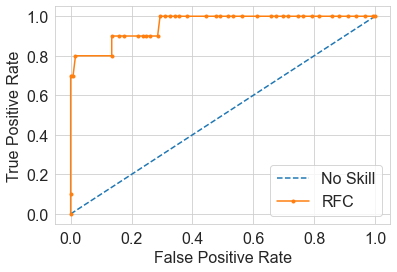

[[126   0]
 [  5   5]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       126
           1       1.00      0.50      0.67        10

    accuracy                           0.96       136
   macro avg       0.98      0.75      0.82       136
weighted avg       0.96      0.96      0.96       136

MSE 0.03676470588235294
Mean :  [0.912 0.941 0.926 0.912 0.941 0.912 0.926 0.941 0.897 0.926]
CV Score  0.92% (+/- 0.01%)


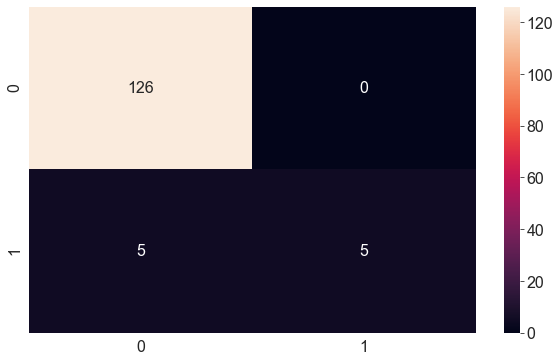

array([0.912, 0.926, 0.926, 0.912, 0.956, 0.897, 0.926, 0.941, 0.897,
       0.941])

In [45]:
from sklearn.ensemble import RandomForestClassifier



rfc = RandomForestClassifier(n_estimators=600)
(rfc_fpr, rfc_tpr, rfc_auc)=Apply_Model(rfc,"RFC",X_train, X_test, y_train, y_test)

cross_val_score(rfc, X, y,cv=10)


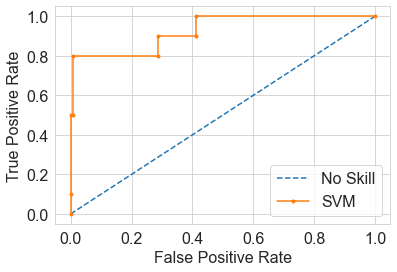

[[126   0]
 [ 10   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       126
           1       0.00      0.00      0.00        10

    accuracy                           0.93       136
   macro avg       0.46      0.50      0.48       136
weighted avg       0.86      0.93      0.89       136

MSE 0.07352941176470588
Mean :  [0.912 0.912 0.912 0.912 0.912 0.912 0.912 0.912 0.897 0.912]
CV Score  0.91% (+/- 0.00%)


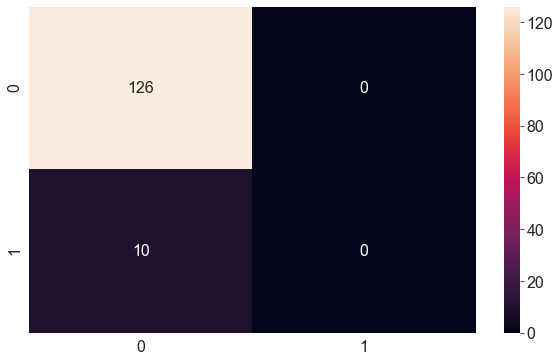

array([0.912, 0.912, 0.912, 0.912, 0.912, 0.912, 0.912, 0.912, 0.912,
       0.912])

In [46]:
from sklearn.svm import SVC
svc_model = SVC(probability=True)

(svm_fpr, svm_tpr, svm_auc)= Apply_Model(svc_model,"SVM",X_train, X_test, y_train, y_test)

cross_val_score(SVC(gamma='auto'), X, y,cv=10)
#m_Cross = np.mean(cross_val_score)
#print("Mean : ",m_Cross)

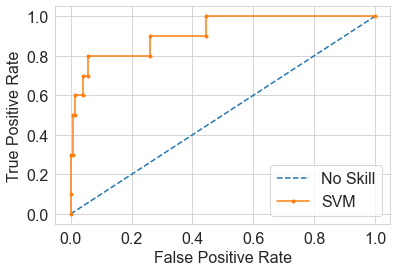

[[126   0]
 [ 10   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       126
           1       0.00      0.00      0.00        10

    accuracy                           0.93       136
   macro avg       0.46      0.50      0.48       136
weighted avg       0.86      0.93      0.89       136

MSE 0.07352941176470588
Mean :  [0.912 0.912 0.912 0.912 0.912 0.912 0.912 0.912 0.912 0.912]
CV Score  0.91% (+/- 0.00%)


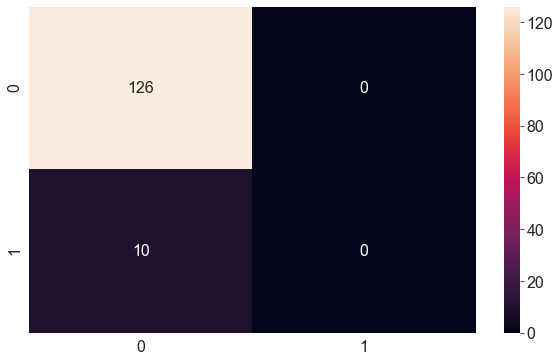

array([0.912, 0.912, 0.912, 0.912, 0.912, 0.912, 0.912, 0.912, 0.912,
       0.912])

In [47]:

svc_model = SVC(probability=True,kernel='rbf', C= 10.0, gamma= 0.1)

(svm_fpr, svm_tpr, svm_auc)= Apply_Model(svc_model,"SVM",X_train, X_test, y_train, y_test)

cross_val_score(SVC(gamma='auto'), X, y,cv=10)

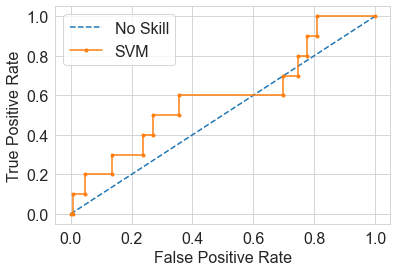

[[110  16]
 [ 10   0]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       126
           1       0.00      0.00      0.00        10

    accuracy                           0.81       136
   macro avg       0.46      0.44      0.45       136
weighted avg       0.85      0.81      0.83       136

MSE 0.19117647058823528
Mean :  [0.824 0.912 0.838 0.779 0.794 0.706 0.912 0.809 0.809 0.824]
CV Score  0.82% (+/- 0.06%)


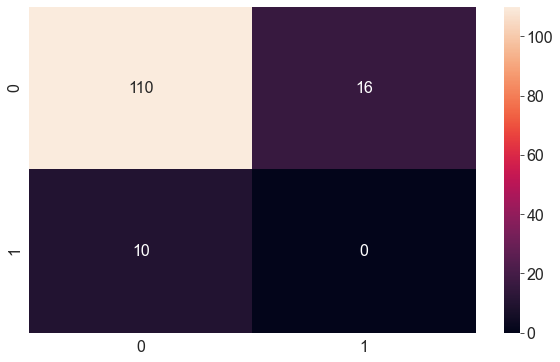

array([0.912, 0.912, 0.912, 0.912, 0.912, 0.912, 0.912, 0.912, 0.912,
       0.912])

In [48]:
svc_model = SVC(probability=True,kernel = 'sigmoid', C= 1000.0, coef0= -10.0, gamma=10.0)

(svm_fpr, svm_tpr, svm_auc)= Apply_Model(svc_model,"SVM",X_train, X_test, y_train, y_test)

cross_val_score(SVC(gamma='auto'), X, y,cv=10)

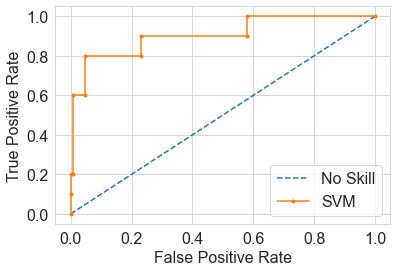

[[125   1]
 [  6   4]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       126
           1       0.80      0.40      0.53        10

    accuracy                           0.95       136
   macro avg       0.88      0.70      0.75       136
weighted avg       0.94      0.95      0.94       136

MSE 0.051470588235294115
Mean :  [0.941 0.897 0.926 0.912 0.897 0.868 0.941 0.956 0.824 0.897]
CV Score  0.91% (+/- 0.04%)


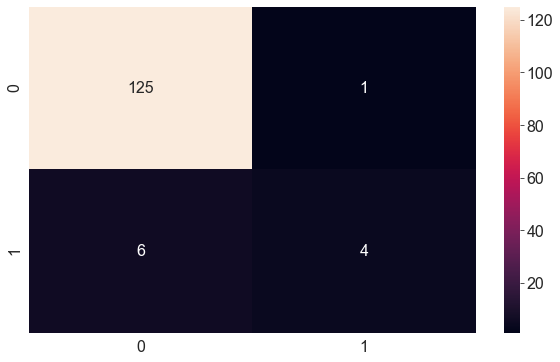

array([0.912, 0.912, 0.912, 0.912, 0.912, 0.912, 0.912, 0.912, 0.912,
       0.912])

In [49]:
svc_model = SVC(probability=True,kernel= 'poly', C= 1.0, coef0= 10.0,gamma= 0.1, degree= 4)

(svm_fpr, svm_tpr, svm_auc)= Apply_Model(svc_model,"SVM",X_train, X_test, y_train, y_test)

cross_val_score(SVC(gamma='auto'), X, y,cv=10)